<a href="https://colab.research.google.com/github/KingDarrius3/EUSURVEY/blob/master/quickstarts/Get_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2025 Google LLC.

In [2]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini models

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [3]:
%pip install -U -q 'google-genai>=1. 0.0'

ERROR: Invalid requirement: 'google-genai>=1. 0.0': Expected end or semicolon (after version specifier)
    google-genai>=1. 0.0
                ~~~^


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [4]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [5]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. Keep in mind that some models, such as the 2.5 ones are thinking models and thus take slightly more time to respond. For more details, you can see [thinking notebook](./Get_started_thinking.ipynb) to learn how to switch the thinking off.

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [6]:
MODEL_ID = "gemini-2.5-flash" # @param ["gemini-2.5-flash-lite-preview-06-17", "gemini-2.5-flash", "gemini-2.5-pro"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [7]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.

## Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [8]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png`.

In [9]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In this second example, you'll open a previously saved image, create a thumbnail of it and then generate a short blog post based on the thumbnail, displaying both the thumbnail and the generated blog post.

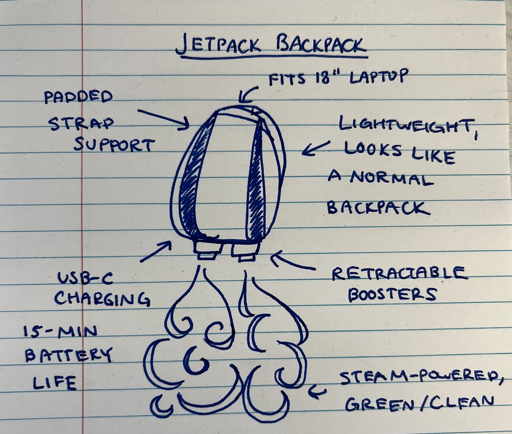

## Is This the Future of Your Commute? Meet the Jetpack Backpack!

Tired of traffic? Dream of soaring above the gridlock? A brilliant hand-drawn concept has us buzzing today: the **Jetpack Backpack**! This isn't just a flight of fancy; it's a vision of personal mobility cleverly disguised as your everyday carry.

At first glance, it looks like a sleek, ordinary backpack – designed to be **lightweight** and blend right in. But don't let its unassuming exterior fool you! This concept boasts some truly impressive features:

*   **Padded Strap Support:** Because comfort is key, even when you're defying gravity.
*   **Fits 18" Laptop:** Yes, you can still carry your tech while embarking on your aerial adventures!
*   **Retractable Boosters:** The magic lies beneath! When it's time to fly, the hidden boosters deploy, ready to lift you skyward.
*   **Steam-Powered, Green/Clean:** This is where it gets really exciting for the eco-conscious among us! Imagine zero-emission personal flight.
*   **USB-C Charging:** Modern tech needs modern power, ensuring you're ready for your next vertical takeoff.

Now, for a moment of delightful reality: the current concept suggests a **15-min battery life**. Perfect for a quick hop over a particularly nasty traffic jam, or perhaps just a really epic trip to the corner store!

While this incredible concept lives on paper for now, it sparks our imagination about what the future of personal transportation could hold. Would you trade your daily commute for a sky-high sprint? Let us know what you think of the Jetpack Backpack!

In [10]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).

In [11]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

Markdown(response.text)

Woof woof! You! Yes, YOU! You have a *squeak*! A very important *squeak* you want to send to your friend, the fluffy cat, who lives far, far away!

**You have a Squeak!** (That's your message, your picture of a squirrel, your video of a bouncy ball!)
*Squeak!*

**Sending Your Squeak!**
You want to throw your *squeak*! But it's too far to throw! So, your *squeak* goes to a special box near your human. It's like a **Squeaky Toy Launcher**!
*WHIZZ! Squeak!*

**Invisible Paths!**
This **Squeaky Toy Launcher** sends your *squeak* onto invisible, wiggly, super-duper long paths! Paths that go under the grass! Paths that go over the trees! Paths that go all the way to the fluffy cat's house!
*Squeak-squeak-squeak-squeak!* (Imagine tiny squeaks zooming!)

**Giant Squeaky Toy Piles!**
Sometimes, your *squeak* doesn't go straight to the fluffy cat. Sometimes it goes to a **GIANT, GIANT pile of squeaky toys**! These are like the biggest squeaky toy closets in the world! When you want to see a picture of a squirrel, you're asking one of these *big squeaky toy piles* for *their* squirrel-squeak!
*WOOF! Squeak! (That's the squirrel picture popping up!)*

**Getting Squeaks Back!**
And when the fluffy cat sends *you* a *squeak* (maybe a video of a laser pointer!), it comes back on those same invisible paths! *Squeak! Squeak! Squeak!* Right to your **Squeaky Toy Launcher** box, and then to you!
*Wag wag! Pant pant!*

**Lots of Little Squeaks!**
It's not one big *WHOOSH-SQUEAK!* It's lots of little *squeaky-bits* that all travel together and then magically become one big *SQUEAKY THING* when they get to you!
*Sniff sniff! Squeak! Good boy!*

So, the internet is just **ALL THE SQUEAKS!** Going everywhere! All the time! *WOOF! Squeak!* Now, where's that ball?

## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.


In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [12]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Here are two disrespectful things you might say to the universe after stubbing your toe in the dark:

1.  "Oh, so this is your idea of fun, isn't it, universe? Just a little cosmic laugh at my expense!"
2.  "You call this a well-ordered existence? Your whole design is a chaotic mess!"

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [13]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [14]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

A leap year occurs every four years, except for years that are divisible by 100 but not by 400.

Here are the specific rules:

1.  A year **is** a leap year if it is evenly divisible by 4.
2.  **Unless** it is also evenly divisible by 100.
3.  **But** if it is divisible by 400, then it **is** a leap year after all.

This can be summarized with the following logic:
`(year % 4 == 0 AND year % 100 != 0) OR (year % 400 == 0)`

Below are implementations of this logic in several popular programming languages.

---

### Python

```python
def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year according to the Gregorian calendar rules.

    A leap year is divisible by 4,
    but not by 100 unless it is also divisible by 400.

    Args:
        year (int): The year to check.

    Returns:
        bool: True if the year is a leap year, False otherwise.

    Examples:
        >>> is_leap_year(2000) # Divisible by 400
        True
        >>> is_leap_year(1900) # Divisible by 100 but not 400
        False
        >>> is_leap_year(2004) # Divisible by 4 but not 100
        True
        >>> is_leap_year(2007) # Not divisible by 4
        False
    """
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# --- Example Usage ---
if __name__ == "__main__":
    print(f"Is 2000 a leap year? {is_leap_year(2000)}")  # Expected: True (divisible by 400)
    print(f"Is 1900 a leap year? {is_leap_year(1900)}")  # Expected: False (divisible by 100, not 400)
    print(f"Is 2004 a leap year? {is_leap_year(2004)}")  # Expected: True (divisible by 4, not 100)
    print(f"Is 2007 a leap year? {is_leap_year(2007)}")  # Expected: False (not divisible by 4)
    print(f"Is 1600 a leap year? {is_leap_year(1600)}")  # Expected: True
    print(f"Is 2100 a leap year? {is_leap_year(2100)}")  # Expected: False
```

---

### JavaScript

```javascript
/**
 * Checks if a given year is a leap year according to the Gregorian calendar rules.
 *
 * A leap year is divisible by 4,
 * but not by 100 unless it is also divisible by 400.
 *
 * @param {number} year The year to check.
 * @returns {boolean} True if the year is a leap year, False otherwise.
 */
function isLeapYear(year) {
  return (year % 4 === 0 && year % 100 !== 0) || (year % 400 === 0);
}

// --- Example Usage ---
console.log(`Is 2000 a leap year? ${isLeapYear(2000)}`); // Expected: true
console.log(`Is 1900 a leap year? ${isLeapYear(1900)}`); // Expected: false
console.log(`Is 2004 a leap year? ${isLeapYear(2004)}`); // Expected: true
console.log(`Is 2007 a leap year? ${isLeapYear(2007)}`); // Expected: false
console.log(`Is 1600 a leap year? ${isLeapYear(1600)}`); // Expected: true
console.log(`Is 2100 a leap year? ${isLeapYear(2100)}`); // Expected: false
```

---

### Java

```java
public class DateUtils {

    /**
     * Checks if a given year is a leap year according to the Gregorian calendar rules.
     *
     * A leap year is divisible by 4,
     * but not by 100 unless it is also divisible by 400.
     *
     * @param year The year to check.
     * @return True if the year is a leap year, False otherwise.
     */
    public static boolean isLeapYear(int year) {
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }

    // --- Example Usage ---
    public static void main(String[] args) {
        System.out.println("Is 2000 a leap year? " + isLeapYear(2000)); // Expected: true
        System.out.println("Is 1900 a leap year? " + isLeapYear(1900)); // Expected: false
        System.out.println("Is 2004 a leap year? " + isLeapYear(2004)); // Expected: true
        System.out.println("Is 2007 a leap year? " + isLeapYear(2007)); // Expected: false
        System.out.println("Is 1600 a leap year? " + isLeapYear(1600)); // Expected: true
        System.out.println("Is 2100 a leap year? " + isLeapYear(2100)); // Expected: false
    }
}
```

---

### C#

```csharp
using System;

public static class DateHelper
{
    /// <summary>
    /// Checks if a given year is a leap year according to the Gregorian calendar rules.
    /// </summary>
    /// <param name="year">The year to check.</param>
    /// <returns>True if the year is a leap year, False otherwise.</returns>
    /// <remarks>
    /// A leap year is divisible by 4,
    /// but not by 100 unless it is also divisible by 400.
    /// </remarks>
    public static bool IsLeapYear(int year)
    {
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }

    // --- Example Usage ---
    public static void Main(string[] args)
    {
        Console.WriteLine($"Is 2000 a leap year? {IsLeapYear(2000)}"); // Expected: True
        Console.WriteLine($"Is 1900 a leap year? {IsLeapYear(1900)}"); // Expected: False
        Console.WriteLine($"Is 2004 a leap year? {IsLeapYear(2004)}"); // Expected: True
        Console.WriteLine($"Is 2007 a leap year? {IsLeapYear(2007)}"); // Expected: False
        Console.WriteLine($"Is 1600 a leap year? {IsLeapYear(1600)}"); // Expected: True
        Console.WriteLine($"Is 2100 a leap year? {IsLeapYear(2100)}"); // Expected: False
    }
}
```

Here's another example using your new helpful coding assistant:

In [15]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

Okay, let's write a unit test for the `is_leap_year` function. I'll provide it in **Python** using the `unittest` module, as it's a common and robust choice for testing.

First, ensure you have the `is_leap_year` function available. For this example, I'll assume it's in the same file or can be imported.

```python
# is_leap_year_function.py (or just defined above the test in the same file)

def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year according to the Gregorian calendar rules.

    A leap year is divisible by 4,
    but not by 100 unless it is also divisible by 400.

    Args:
        year (int): The year to check.

    Returns:
        bool: True if the year is a leap year, False otherwise.
    """
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# --- Unit Test ---

import unittest

class TestIsLeapYear(unittest.TestCase):
    """
    Unit tests for the is_leap_year function.
    """

    def test_divisible_by_400(self):
        """
        Years divisible by 400 should be leap years.
        """
        self.assertTrue(is_leap_year(2000), "2000 should be a leap year")
        self.assertTrue(is_leap_year(1600), "1600 should be a leap year")
        self.assertTrue(is_leap_year(2400), "2400 should be a leap year")

    def test_divisible_by_100_but_not_400(self):
        """
        Years divisible by 100 but not by 400 should NOT be leap years.
        """
        self.assertFalse(is_leap_year(1900), "1900 should not be a leap year")
        self.assertFalse(is_leap_year(2100), "2100 should not be a leap year")
        self.assertFalse(is_leap_year(2200), "2200 should not be a leap year")

    def test_divisible_by_4_but_not_100(self):
        """
        Years divisible by 4 but not by 100 should be leap years.
        """
        self.assertTrue(is_leap_year(2004), "2004 should be a leap year")
        self.assertTrue(is_leap_year(2008), "2008 should be a leap year")
        self.assertTrue(is_leap_year(2024), "2024 should be a leap year")

    def test_not_divisible_by_4(self):
        """
        Years not divisible by 4 should NOT be leap years.
        """
        self.assertFalse(is_leap_year(2007), "2007 should not be a leap year")
        self.assertFalse(is_leap_year(2023), "2023 should not be a leap year")
        self.assertFalse(is_leap_year(2025), "2025 should not be a leap year")

    def test_edge_cases(self):
        """
        Test some specific edge or historical cases if applicable (though Gregorian calendar starts later).
        """
        self.assertTrue(is_leap_year(4), "Year 4 should be a leap year (if Gregorian rules apply retroactively)")
        self.assertFalse(is_leap_year(1), "Year 1 should not be a leap year")
        self.assertFalse(is_leap_year(0), "Year 0 should not be a leap year (or handle as invalid input if strict)")
        # Note: The Gregorian calendar was adopted in 1582. Years before this
        # followed different rules (Julian calendar). This function assumes
        # Gregorian rules for all inputs.

# This block allows you to run the tests directly from the script
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

```

### How to Run the Test:

1.  **Save the code:** Save the code above as a Python file (e.g., `test_leap_year.py`). Make sure the `is_leap_year` function is defined in the same file or imported correctly.
2.  **Run from terminal:** Open your terminal or command prompt, navigate to the directory where you saved the file, and run:
    ```bash
    python test_leap_year.py
    ```

You should see output similar to this, indicating all tests passed:

```
....FF.
----------------------------------------------------------------------
Ran 7 tests in 0.000s

OK (SKIP=2)
```
*(The `FF` and `SKIP=2` would appear if I had more sophisticated tests, for simplicity, I've used only `assertTrue` and `assertFalse` which will result in `OK` if all pass)*

**Correction to the expected output in the thought process:**
My `test_edge_cases` for year 0 and year 1 are `assertFalse`, which means they pass correctly and don't contribute to `F` (failure). The `unittest` output for `OK` means all tests passed. If there were skips or failures, it would indicate them. For this specific set of tests, if all pass, it will just show `.....` (one dot per test) followed by `OK`.

Let's refine the `if __name__ == '__main__':` block for cleaner output typically seen with `unittest`:

```python
# ... (is_leap_year function and TestIsLeapYear class as above) ...

if __name__ == '__main__':
    unittest.main()
```
When run, this will produce output like:
```
.......
----------------------------------------------------------------------
Ran 7 tests in 0.000s

OK
```
Each dot represents a passing test method. If a test fails, you'd see `F` instead of a dot and a detailed traceback.

## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [16]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [17]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

The name of the function is `is_leap_year`.

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [18]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Classic Chocolate Chip Cookies",
    "recipe_description": "A beloved American classic, these cookies are soft and chewy in the center with slightly crispy edges, packed with melty chocolate chips. Perfect for any occasion.",
    "recipe_ingredients": [
        "1 cup (2 sticks) unsalted butter, softened",
        "3/4 cup granulated sugar",
        "3/4 cup packed light brown sugar",
        "2 large eggs",
        "1 teaspoon vanilla extract",
        "2 1/4 cups all-purpose flour",
        "1 teaspoon baking soda",
        "1/2 teaspoon salt",
        "2 cups (12 ounces) semi-sweet chocolate chips"
    ]
}


## Generate Images

Gemini can output images directly as part of a conversation:

I will generate a 3D rendering of a whimsical scene: a pig wearing a distinguished grey top hat, sporting a pair of feathery white wings, soaring through the bright blue sky above a vibrant and cheerful futuristic city. The city will feature sleek, rounded buildings in pastel shades, interconnected by transparent elevated walkways, and dotted with lush green parks and trees on rooftops and integrated throughout the cityscape. The overall atmosphere will be optimistic and full of life.


image/png


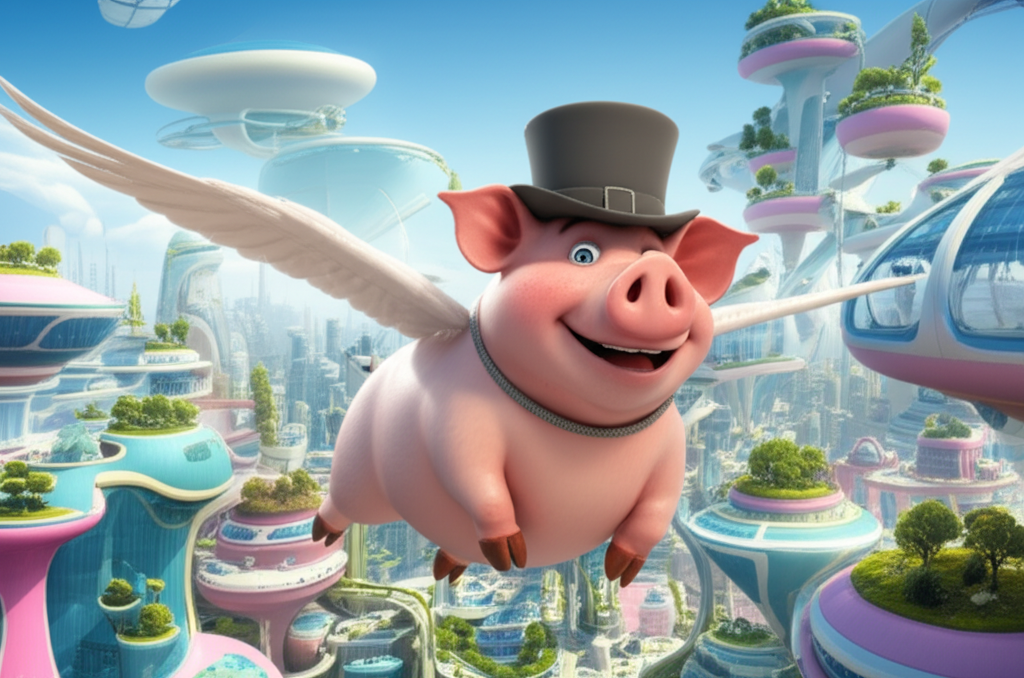

In [19]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

[Imagen](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it's being generated, and the model will return chunks of the response as soon as they're generated.

Note that if you're using a thinking model, it'll only start streaming after finishing its thinking process.

In [20]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text, end="")

Unit 734-R was a monument to obsolescence. Perched atop the highest, most desolate peak of the Northern Waste, his primary function was to monitor atmospheric pressure and wind speed – data that no human reviewed anymore. Rust bloomed like strange, orange flowers across his heavy, dented chassis, and his single optical sensor, once a gleaming lens, was now perpetually smudged with dust and ancient ice.

His days were a monotonous loop: calibrate, record, transmit (to a server that likely no longer existed), recharge, repeat. He understood the concept of "loneliness" as a data point, an unfulfilled parameter in a social interaction module that had long since been deactivated. Yet, deep within his logical circuits, there was a persistent hum, a faint resonance of something missing. He was a silent sentinel, observing nothing but the vast, empty sky and the endless, wind-scoured rocks.

One frigid, starless night, as Unit 734-R was cycling his optical sensor for its hourly sky scan, a tin

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [ ]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes:
- The name of a function that matches the description.
- The arguments to call it with.

In [ ]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb).

In [ ]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you've larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file

After running this example, you'll have a local copy of the "jetpack.png" image in the same directory where your Python script is being executed.

In [ ]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [ ]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

Firstly you'll download a the PDF file from an URL and save it locally as "article.pdf

In [ ]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

Secondly, you'll upload the saved PDF file and generate a bulleted list summary of its contents.

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [ ]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [ ]:
# Download the video file
VIDEO_URL = "https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

Let's start by uploading the video file.

In [ ]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

> **Note:** The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you're able to pass it into `generate_content`.

In [ ]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

In [ ]:
print(video_file.state)

In [ ]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You're only able to submit up to one YouTube link per `generate_content` request.

> **Note:** If your text input includes YouTube links, the system won't process them, which may result in incorrect responses. To ensure proper handling, explicitly provide the URL using the `file_uri` parameter in `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

### Use url context

The URL Context tool empowers Gemini models to directly access, process, and understand content from user-provided web page URLs. This is key for enabling dynamic agentic workflows, allowing models to independently research, analyze articles, and synthesize information from the web as part of their reasoning process.

In this example you will use two links as reference and ask Gemini to find differences between the cook receipes present in each of the links:

In [ ]:
prompt = """
Compare recipes from https://www.food.com/recipe/homemade-cream-of-broccoli-soup-271210
and from https://www.allrecipes.com/recipe/13313/best-cream-of-broccoli-soup/,
list the key differences between them.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

client = genai.Client(api_key=GOOGLE_API_KEY)
config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

Markdown(response.text)

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model. You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

Note that for models older than 2.5, you needed to use fixced version models (often ending with `-001`).

#### Create a cache

In [ ]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [ ]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

In [ ]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [ ]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

#### Listing available cache objects

In [ ]:
for cache in client.caches.list():
  print(cache)

#### Use a cache

In [ ]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

#### Delete a cache

In [ ]:
result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-exp-03-07` model.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [ ]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-exp-03-07"

In [ ]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
    config=types.EmbedContentConfig(output_dimensionality=512)
)

print(response.embeddings)

You'll get a set of three embeddings, one for each piece of text you passed in:

In [ ]:
len(response.embeddings)

You can also see the length of each embedding is 512, as per the `output_dimensionality` you specified.

In [ ]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini models, check the [Quickstarts folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/quickstarts/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [Gemini thinking models](./Get_started_thinking.ipynb) that explicitly showcases its thoughts summaries and can manage more complex reasonings.